In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def     data_frame(pair_name):
    folder_path=f"C:\\Users\\manch\\OneDrive\\Documents\\dev\\Trading\\Synthetics\\Step_index\\data_files\\labeled"
    file        =   folder_path+f"\\{pair_name}"
    df          =   pd.read_csv(file,sep=' ')
    return df

In [3]:
df=data_frame(pair_name="dfUltimate_Moving Average Trends_STEP_INDEX_M1_20_20.0_99969.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99969 entries, 0 to 99968
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time Stamps          99969 non-null  object 
 1   Instance             99969 non-null  int64  
 2   Trunced Closes       99969 non-null  float64
 3   Trunced Ma           99969 non-null  float64
 4   Ma Close Diff        99969 non-null  float64
 5   Linear Reg Slope     99969 non-null  float64
 6   Trend Change         99969 non-null  float64
 7   Slope Ma             99969 non-null  float64
 8   Slope Ma Close diff  99969 non-null  float64
 9   Slope Trend          99969 non-null  float64
 10  Slope Linear Reg     99969 non-null  float64
 11  Peak                 99969 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 9.2+ MB


In [4]:
y=df["Peak"]
df.pop("Peak")
df.pop("Time Stamps")
df.pop("Instance")
X=df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99969 entries, 0 to 99968
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trunced Closes       99969 non-null  float64
 1   Trunced Ma           99969 non-null  float64
 2   Ma Close Diff        99969 non-null  float64
 3   Linear Reg Slope     99969 non-null  float64
 4   Trend Change         99969 non-null  float64
 5   Slope Ma             99969 non-null  float64
 6   Slope Ma Close diff  99969 non-null  float64
 7   Slope Trend          99969 non-null  float64
 8   Slope Linear Reg     99969 non-null  float64
dtypes: float64(9)
memory usage: 6.9 MB


In [5]:
X_train, X_test, y_train, y_test = X[:80000], X[80000:], y[:80000], y[80000:]
y_train_5 = (y_train == 'crest') # True for all 5s, False for all other digits
y_test_5 = (y_test == 'crest')

In [6]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [7]:
some_peak=X.iloc()[0]
sgd_clf.predict([some_peak])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [8]:
#measuring perfomance
#we use a custom implementation of cross validation that offers more control over the parameters
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5,scoring="accuracy")

array([0.902875 , 0.9028125, 0.9025   , 0.8986875, 0.0971875])

In [9]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) 

False


In [10]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=10,scoring="accuracy")

array([0.902875, 0.902875, 0.902875, 0.902875, 0.902875, 0.902875,
       0.90275 , 0.90275 , 0.90275 , 0.90275 ])

In [11]:
#measure of perfomance by confussion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5,cv=10)


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[61172, 11054],
       [ 6206,  1568]])

In [13]:
#evaluating the confusion matrix by  its scores
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) 

np.float64(0.12422753921723974)

In [14]:
recall_score(y_train_5, y_train_pred)

np.float64(0.2016979675842552)

In [15]:
#evaliuating the  perfomance metric f1 score which is a combination of the precision and the recall of a model
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

np.float64(0.15375563836046283)

Increasing precision reduces recall, and vice versa. This is called the precision/recall trade-off.

look at how the SGDClassifier makes its classification decisions.
For each instance, it computes a score based on a decision function. 
If that score is greater than a threshold,
it assigns the instance to the positive class;
otherwise it assigns it to the negative class.
we can use the decision scores to plot the precision/recall trade off.


In [16]:
y.head()

0    trough
1    rising
2    rising
3     crest
4    trough
Name: Peak, dtype: object

In [17]:
aCrest=X.iloc()[3]
print(aCrest)
y_scores = sgd_clf.decision_function([aCrest])
y_scores

Trunced Closes         10040.30000
Trunced Ma             10039.40412
Ma Close Diff              0.89588
Linear Reg Slope           0.00116
Trend Change               1.00000
Slope Ma                  -0.12083
Slope Ma Close diff        0.72083
Slope Trend                0.60000
Slope Linear Reg           0.00093
Name: 3, dtype: float64


c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([-13357.1619664])

In [18]:
threshold = 0
y_some_peak_pred = (y_scores > threshold)
print(y_some_peak_pred)

[False]


In [19]:
threshold = 3000
y_some_peak_pred = (y_scores > threshold)
y_some_peak_pred

array([False])

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [21]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds =precision_recall_curve(y_train_5, y_scores)

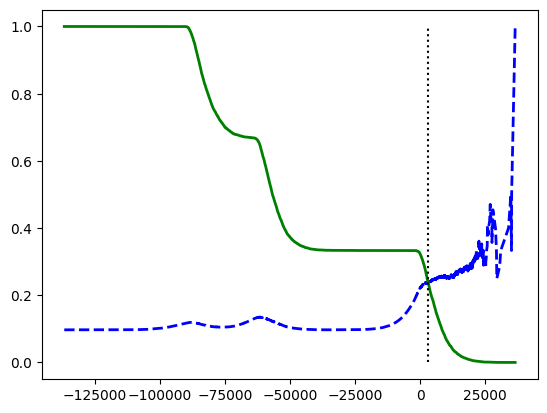

In [22]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision",
linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall",
linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

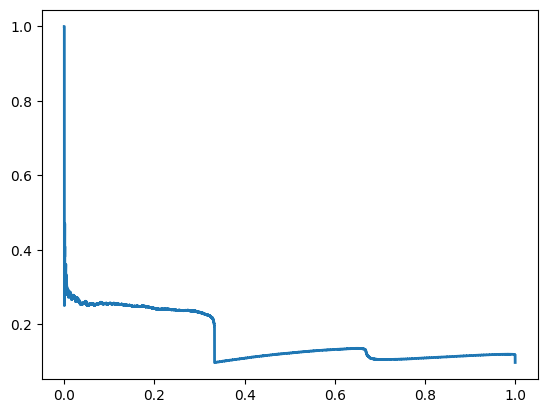

In [23]:
plt.plot(recalls, precisions, linewidth=2,label="Precision/Recall curve")

plt.show()

In [24]:
#find the threshhold that gives you a 90% precision
#idx_for_90_precision = (precisions >= 0.90).argmax()
#threshold_for_90_precision = thresholds[idx_for_90_precision]
#threshold_for_90_precision

In [25]:
#you can now make train and make claassifications that have a 90% precision using the threshhold
#y_train_pred_90 = (y_scores >= threshold_for_90_precision)
#precision_score(y_train_5, y_train_pred_90)

In [26]:
#recall_score(y_train_5,y_train_pred_90)

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

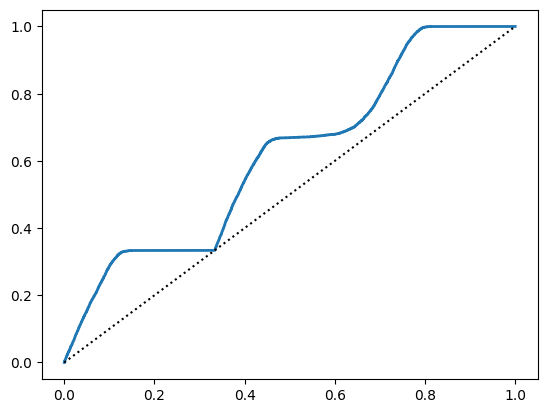

In [28]:
#idx_for_threshold_at_90 = (thresholds <=threshold_for_90_precision).argmax()
#tpr_90, fpr_90 = tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
#plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.6153676532194834)

In [30]:
# anew classifier...a random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [31]:
y_probas_forest = cross_val_predict(forest_clf, X_train,y_train_5, cv=3,method="predict_proba")

In [32]:
y_probas_forest[:2]

array([[1.  , 0.  ],
       [0.54, 0.46]])

In [33]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest =precision_recall_curve(y_train_5, y_scores_forest)

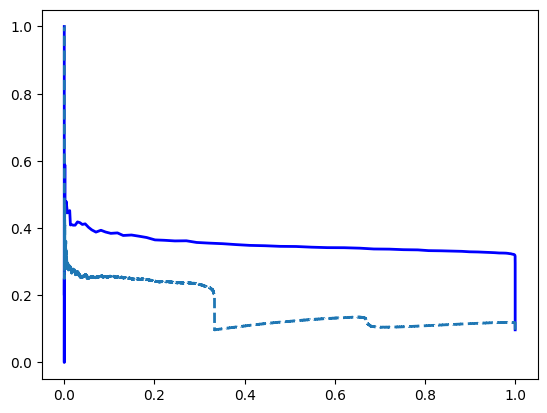

In [34]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.show()

In [35]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5 #positive proba ≥ 50%
f1Score=f1_score(y_train_5, y_train_pred_forest)

rocAucScore=roc_auc_score(y_train_5, y_scores_forest)
print(f1Score)
print(rocAucScore)

0.2140548527103149
0.895344499935318


In [36]:
#lets implement One-vs-One classifier.
#Since there are 4 classes (i.e., more than 2), Scikit-Learn used the OvO strategy and trained 45 binary classifiers.

from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_peak])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['rising'], dtype=object)

In [37]:
aCrest=X.iloc()[10]
svm_clf.predict([aCrest])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['rising'], dtype=object)

In [38]:
#lets have a look at the decision scores used to make the prediction
some_digit_scores = svm_clf.decision_function([some_peak])
some_digit_scores.round(2)

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[-0.25,  2.17,  3.25,  0.83]])

In [39]:
#the scores also have the class ids index
#we can view the class by accessing the svc classifiers classes 
class_id = some_digit_scores.argmax()
svm_clf.classes_[class_id]

'rising'

In [40]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:20000], y_train[:20000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [41]:
prediction_ovr=ovr_clf.predict([aCrest])
len_trained_classes=len(ovr_clf.estimators_)
#some_digit are the description of target 0 at y_train[0] since some digit is X[0]
print("it recognised ",y_train[0]," as ",prediction_ovr,"and was trained on this number of classes:",len_trained_classes)

it recognised  trough  as  ['rising'] and was trained on this number of classes: 4


c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [42]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([aCrest])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['rising'], dtype='<U7')

In [43]:
sgd_clf.decision_function([aCrest]).round()

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[ -33502., -203360.,   52921.,    9361.]])

In [44]:
cross_val_score(sgd_clf, X_train, y_train, cv=3,scoring="accuracy")

array([0.41208235, 0.09716129, 0.09783995])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,scoring="accuracy")


array([0.80466494, 0.80492744, 0.80372009])

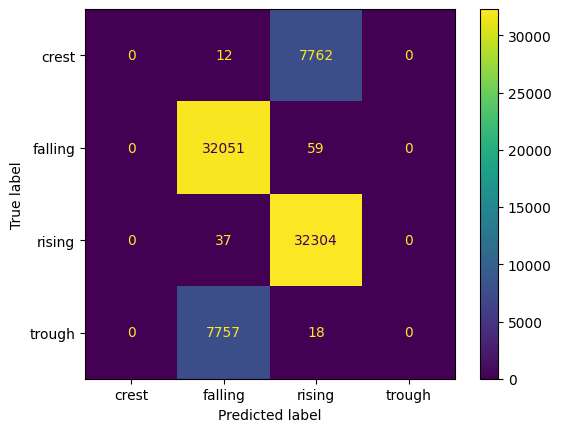

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled,y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()


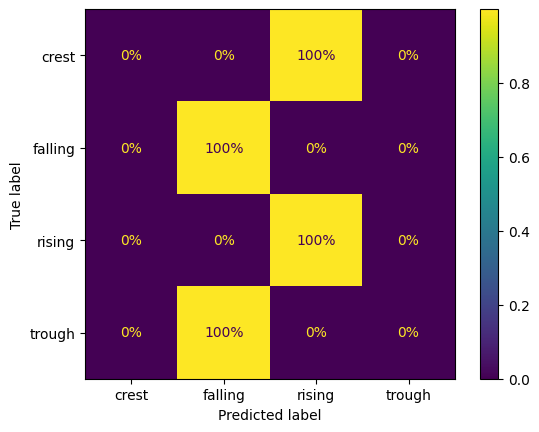

In [47]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,normalize="true",values_format=".0%")
plt.show()


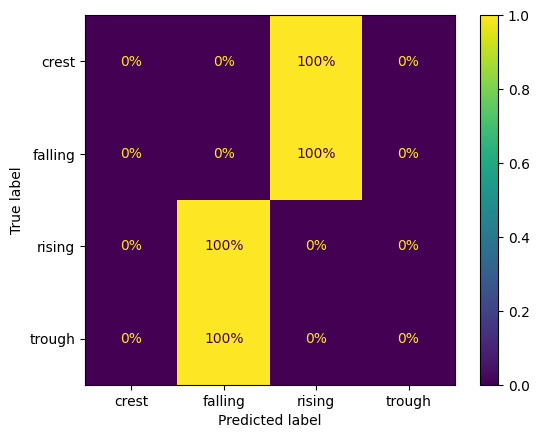

In [48]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight,normalize="true",values_format=".0%")
plt.show()

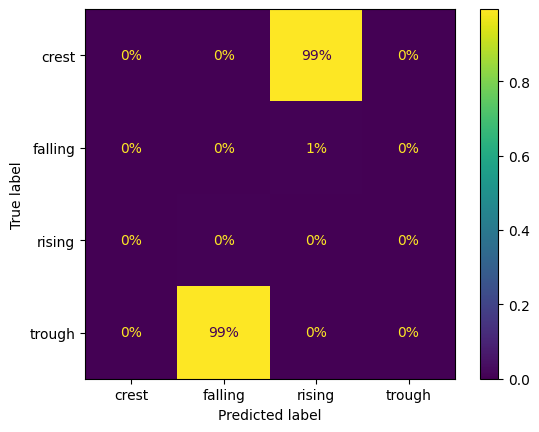

In [49]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight,normalize="pred",values_format=".0%")
plt.show()

In [50]:
X[100:]

,Trunced Closes,Trunced Ma,Ma Close Diff,Linear Reg Slope,Trend Change,Slope Ma,Slope Ma Close diff,Slope Trend,Slope Linear Reg
100,10045.7,10046.41600,-0.71600,-0.00052,-2.0,-0.34013,0.34013,0.0,-0.00177
101,10046.1,10046.21918,-0.11918,-0.00103,-1.6,-0.19682,0.59682,0.4,-0.00051
102,10045.5,10046.11638,-0.61638,-0.00165,-2.2,-0.10279,-0.49721,-0.6,-0.00062
103,10044.3,10045.92877,-1.62877,-0.00261,-3.4,-0.18761,-1.01239,-1.2,-0.00095
104,10044.5,10045.82399,-1.32399,-0.00233,0.2,-0.10478,0.30478,3.6,0.00028
...,...,...,...,...,...,...,...,...,...
99964,10050.0,10049.07740,0.92260,-0.00008,1.2,-0.06168,0.46168,0.4,0.00215
99965,10049.2,10049.23307,-0.03307,0.00069,-0.8,0.15567,-0.95567,-2.0,0.00076
99966,10050.2,10049.51936,0.68064,0.00111,1.0,0.28630,0.71370,1.8,0.00042
99967,10050.2,10049.69112,0.50888,0.00112,1.0,0.17176,-0.17176,0.0,0.00001


In [51]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [52]:
ovr_clf.score(X_test,y_test)

In [ ]:
ovr_clf.predict([some_peak])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['falling'], dtype='<U7')

In [ ]:
svm_clf.score(X_test,y_test)

0.4005708848715509

In [ ]:
svm_clf.predict([some_peak])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['rising'], dtype=object)

In [ ]:
knn_clf.predict([some_peak])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['falling'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train.astype("float64"))
cross_val_score(knn_clf, X_train_scaled, y_train, cv=3,scoring="accuracy")

array([0.75891551, 0.75002812, 0.76029401])

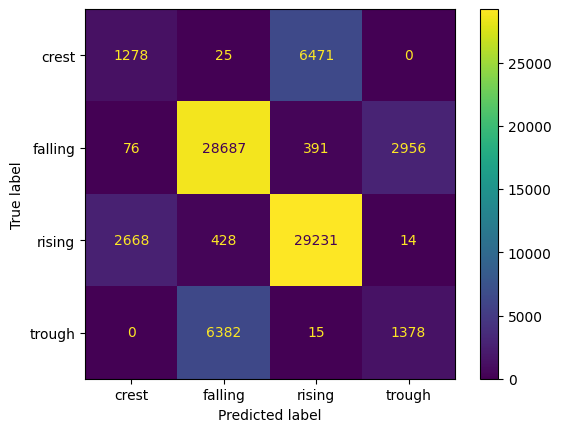

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(knn_clf, X_train_scaled,y_train, cv=4)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

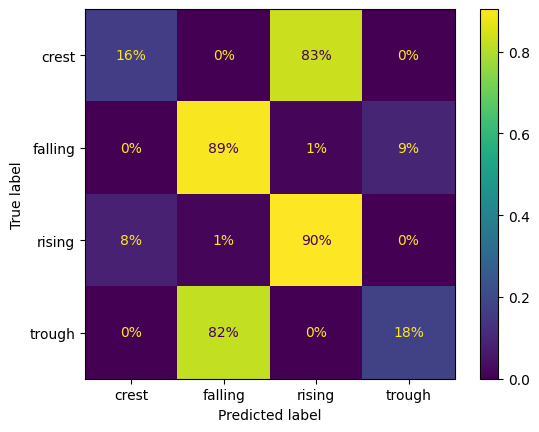

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,normalize="true",values_format=".0%")
plt.show()

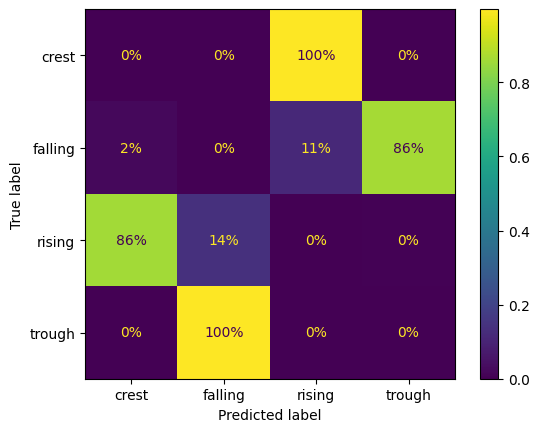

In [ ]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight,normalize="true",values_format=".0%")
plt.show()

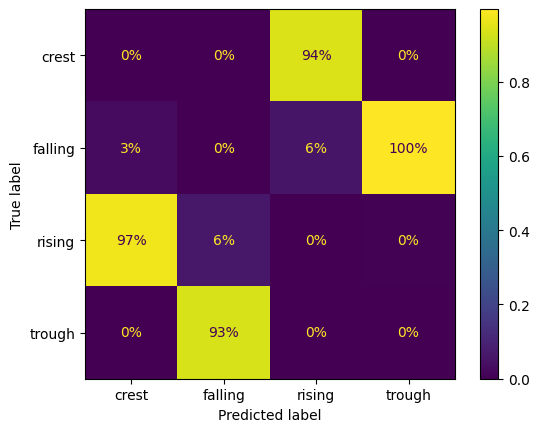

In [ ]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight,normalize="pred",values_format=".0%")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred=knn_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       crest       0.31      0.18      0.23      1995
     falling       0.81      0.91      0.86      7980
      rising       0.81      0.89      0.85      7999
      trough       0.33      0.18      0.23      1995

    accuracy                           0.76     19969
   macro avg       0.57      0.54      0.54     19969
weighted avg       0.71      0.76      0.73     19969



In [ ]:
from sklearn.metrics import classification_report
y_pred=ovr_clf.predict(X_test)
print(classification_report(y_test,y_pred))

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       crest       0.00      0.00      0.00      1995
     falling       0.73      0.99      0.84      7980
      rising       0.78      0.89      0.83      7999
      trough       0.00      0.00      0.00      1995

    accuracy                           0.75     19969
   macro avg       0.38      0.47      0.42     19969
weighted avg       0.60      0.75      0.67     19969



c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
forest_clf.fit(X_train,y_train)
y_pred=forest_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       crest       0.44      0.09      0.15      1995
     falling       0.81      0.98      0.88      7980
      rising       0.81      0.97      0.88      7999
      trough       0.43      0.07      0.13      1995

    accuracy                           0.79     19969
   macro avg       0.62      0.53      0.51     19969
weighted avg       0.73      0.79      0.73     19969

